#PROYEK ANALISIS DATA : AIR QUALITY DATASET

Nama : Musliadi

Email : m322b4ky3158@bangkit.academy

# 1. Menentukan Pertanyaan Bisnis

- Is there a significant change in PM2.5 in each month?
- Is there a relationship between NO2 and CO?
- How PM2.5 compares to PM10 each year?


# 2. Import Library Yang digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Data Wrangling

# a. Gethering Data

In [ ]:
airdata_df = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv")
airdata_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


# b. Assessing Data

In [ ]:
airdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
airdata_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,382
PM10,284
SO2,575
NO2,1070
CO,1812


terdapat missing value pada beberapa fitur seperti PM2.5, PM10, SO2, NO2, CO, O3,TEMP, PRES, DEWP, RAIN, wd dan WSPM

In [ ]:
airdata_df.duplicated().sum()

0

Tidak terdapat data duplikat

In [ ]:
airdata_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


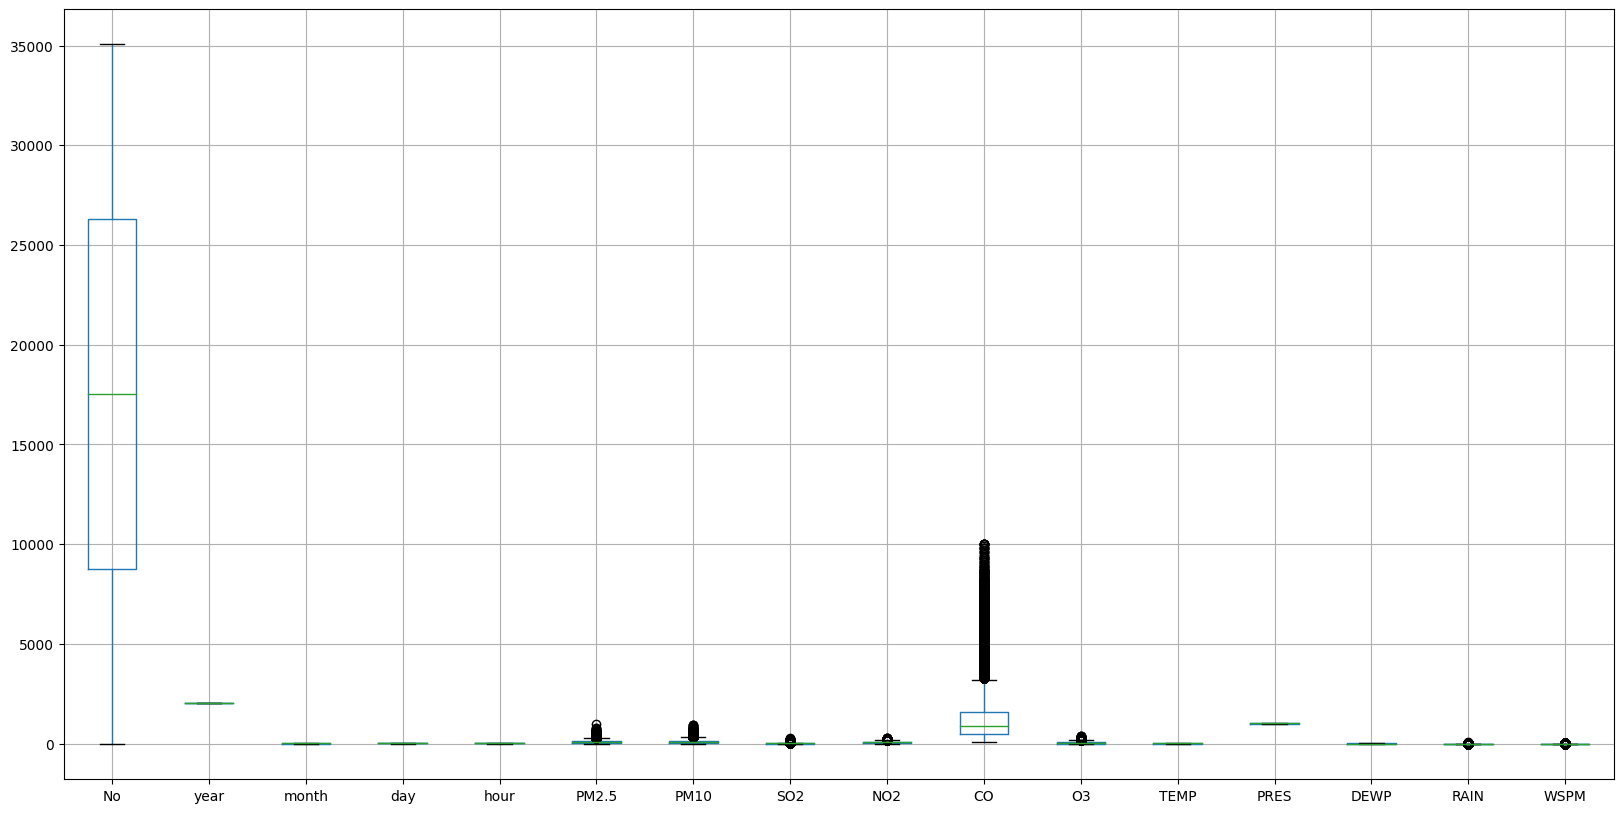

In [ ]:
plt.figure(figsize=(20, 10))
airdata_df.boxplot()
plt.show()

titik yang berada diluar boxplot seperti P2.5, PM10,SO2, NO2, CO, O3, Rain dan WSPM adalah outlier

# b. Cleaning Data

In [ ]:
airdata_df.interpolate(method='linear', limit_direction='forward', inplace=True)

<ipython-input-11-fe5f0b01daec>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  airdata_df.interpolate(method='linear', limit_direction='forward', inplace=True)


In [ ]:
airdata_df.wd.value_counts()

,count
wd,
NE,6703
SW,4644
ENE,3642
NNE,3327
N,3219
WSW,2529
SSW,2101
NNW,1397
W,1335


In [ ]:
airdata_df.fillna(value='NNE', inplace=True)

In [ ]:
airdata_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


Nilai missing value sudah teratasi

# 4. Eksploratory Data Analysis

In [ ]:
airdata_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Wanliu
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6703,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.467612,110.707858,18.409514,65.668418,1328.761180,46.909375,13.425795,1011.102678,3.263752,0.068224,NaN,1.501393,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.125058,93.539605,22.679906,37.966984,1263.218948,54.451718,11.348183,10.356118,13.679508,0.896471,NaN,1.104645,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.543400,600.000000,3.000000,3.100000,1002.500000,-8.100000,0.000000,NaN,0.800000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,61.000000,900.000000,29.000000,14.300000,1010.800000,4.000000,0.000000,NaN,1.200000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,89.000000,1600.000000,70.000000,22.900000,1019.400000,15.800000,0.000000,NaN,2.000000,NaN


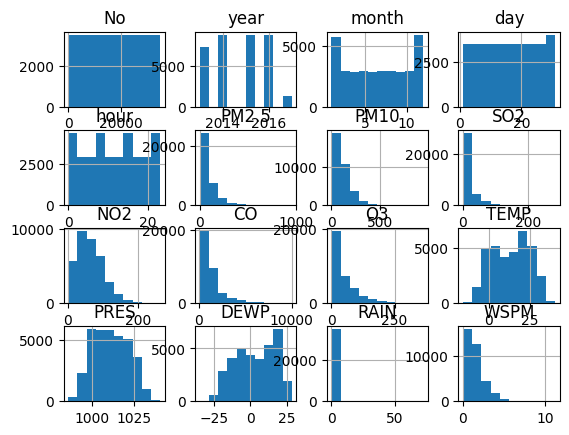

In [ ]:
airdata_df.hist()
plt.show()

fitur seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN berdistibusi kekanan. Sedang fitur lainya berdistribusi secara normal

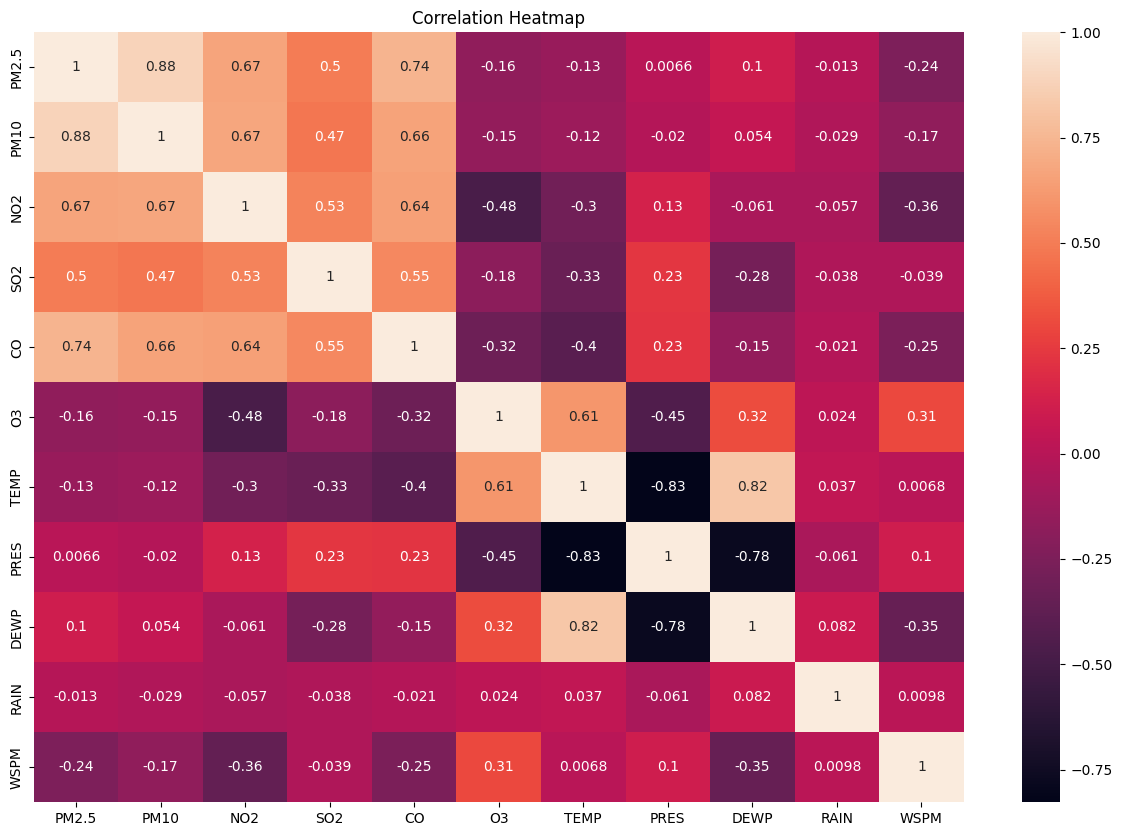

In [ ]:
corr = airdata_df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

Tidak ada korelasi yang terlalu kuat antara fitur

# 5. Visualialization & Ekplanatory Analysis

a. Question 1 : Is there a significant change in PM2.5 in each month?

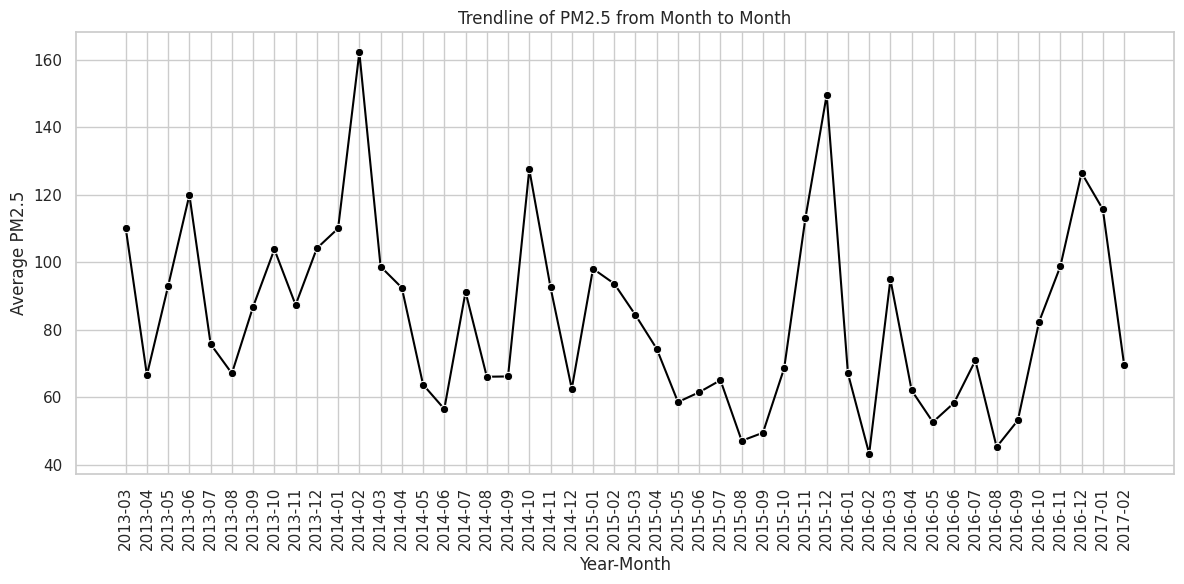

In [ ]:
# Merge year and month columns into a new column
airdata_df['year_month'] = airdata_df['year'].astype(str) + '-' + airdata_df['month'].astype(str).str.zfill(2)

# Calculating monthly average PM2.5
pm25_monthly = airdata_df.groupby('year_month')['PM2.5'].mean().reset_index()

# Membuat plot trendline PM2.5 dari bulan ke bulan
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=pm25_monthly, x='year_month', y='PM2.5', marker='o', color='Black')
plt.xlabel('Year-Month')
plt.ylabel('Average PM2.5')
plt.title('Trendline of PM2.5 from Month to Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Terdapat perubahan atau fluktuasi angka PM2.5 setiap bulannya, dimana nilai tertinggi pada bulan Februari 2014 dan terendah pada bulan Agustus 2015.

b. Question 2 : Is there a relationship between NO2 and CO?

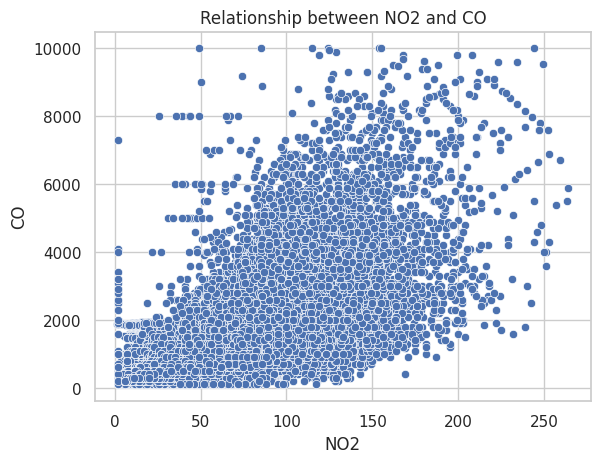

0.643297105590576
There is a strong positive correlation between NO2 and CO.


In [ ]:
# Relationship between NO2 and CO
plt.title('Relationship between NO2 and CO')
sns.scatterplot(x='NO2', y='CO', data=airdata_df)
plt.xlabel('NO2')
plt.ylabel('CO')
plt.show()

# Correlation test between NO2 and CO
correlation = airdata_df['NO2'].corr(airdata_df['CO'])
print(correlation)

if correlation > 0.5:
    print("There is a strong positive correlation between NO2 and CO.")
elif correlation < -0.5:
    print("There is a strong negative correlation between NO2 and CO.")
else:
    print("There is no strong correlation between NO2 and CO.")


Berdasarkan scatter plot, terdapat hubungan positif yang kuat antara NO2 dan CO, artinya peningkatan NO2 terjadi bersamaan dengan peningkatan CO. Hal ini juga dibuktikan dengan nilai korelasi sebesar 0,64 yang mendekati angka 1.

c. Question 3 : How PM2.5 compares to PM10 each year?

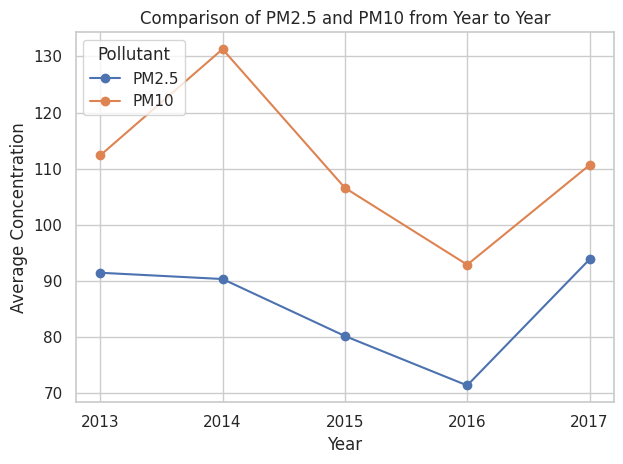

In [ ]:
# Calculating the average PM2.5 and PM10 for each year
pm_yearly = airdata_df.groupby('year')[['PM2.5', 'PM10']].mean()

# Comparison of PM2.5 and PM10 from Year to Year
pm_yearly.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Average Concentration')
plt.title('Comparison of PM2.5 and PM10 from Year to Year')
plt.xticks(pm_yearly.index)
plt.grid(True)
plt.legend(title='Pollutant', loc='upper left')
plt.tight_layout()
plt.show()

Nilai PM10 selalu lebih tinggi dari nilai PM2.5 setiap tahunnya.

# 6. Conclusion

- Is there a significant change in PM2.5 in each month?
>There are changes or fluctuations in the PM2.5 number every month, where the highest value was in February 2014 and the lowest value was in August 2015.
    
- Is there a relationship between NO2 and CO?
>Based on the scatter plot, there is a strong positive relationship between NO2 and CO, meaning that an increase in NO2 occurs together with an increase in CO. This is also evidenced by the correlation value of 0.64, which is close to 1.
    
- How PM2.5 compares to PM10 each year?
>PM10 values are always higher than PM2.5 values every year.